<a href="https://colab.research.google.com/github/yyaaoonngg/Price-Analysis-of-Fresh-Food/blob/main/%EC%8B%A0%EC%84%A0%EC%8B%9D%ED%92%88_%EB%AC%BC%EA%B0%80_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주제
> **신선식품 물가 분석**


최근 우리나라 신선식품 물가가 가파르게 상승하고 있고, 한 번 오른 물가가 다시 내리지 않는 경향이 있어서 원인이 무엇일지 알아보고자 주제를 선정했다. 본 프로젝트를 통해 식품 물가를 오르게 하는 요인이나, 유통 과정에서의 가격 차이 및 최종 소비자가가 비싼 이유를 분석하고자 한다. 음식 가격에 있어서 날씨 등 직관적으로 관련 있는 것부터 사회 현상까지 중요한 것을 확인하고자 한다.

# 가설
1) 식품 물가 결정에 날씨보다 큰 영향을 미치는 것이 있을 것이다.
- 분석 방법: 회귀를 통해, 관견이 있을 것으로 생각되는 factor들을 넣어 (기온, 강수량, 물가, 유가, 환율, 선거유세기간) 가장 중요도가 높은 factor를 찾아본다.

2) 도매가와 소매가가 비례하지 않을 것이다.
- 분석 방법: 통계분석을 통해, 도매가와 소매가가 얼마나 유의미하게 차이나는지 알아 본다.

# 데이터 수집

## 데이터 직접 다운로드
1. 품목별 도소매 가격 데이터<br>
[농식품 빅데이터 거래소](https://kadx.co.kr/opmk/frn/pmumkproductDetail/PMU_628bc651-1501-4668-aa85-42e8f59d6a9b/5#)
2023년 06월~2024년 04월까지의 다양한 농산물들의 도매, 소매 가격 데이터 제공

2. 기후/날씨 데이터<br>
[기상청 기상자료개방포](https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do) 2023년 01월~2024년 04월까지의 지역별 평균기온 및 강수량 데이터 제공
- 지역마다 기온 및 강수량이 다르기 때문에, 위도와 기후가 다르며 농경지로 개발이 되어있는 지역을 총 세 개 (강릉, 해남, 제주) 선정하여 데이터 습득


## 크롤링
[LISTLY](https://www.listly.io/)라는 크롤링 도구를 이용하여 진행
1. 소비자 물가 지수<br>
[CPI소비자물가지수](https://kostat.go.kr/cpidtval.es?mid=b70201010000)의 월별 소비자물가지수 데이터
2. 환율<br>
[Investing](https://kr.investing.com/currencies/usd-krw-historical-data)의 월별 USD KRW 과거 데이터
3. 국제 원유 가격 데이터<br>




## 추가 data point
- 24년 3월 4월 선거기간
- 23년 10월 이스라엘-하마스 전쟁 발발


# 데이터 전처리
## 식품 소-도매가 데이터 전처리
월별로 도/소매 거래 일자 및 데이터 길이가 모두 다르므로, 이를 맞춰주기 위해 각 월의 데이터 값들을 평균내어 정리하기로 했다.

In [ ]:
# 원본 데이터; 6월 데이터
path = '/content/drive/MyDrive/응데분/플젝/raw/'
data = pd.read_csv(path+'2023_06.csv', encoding='cp949')
data

,PRCE_REG_YMD,PDLT_CODE,PDLT_NM,SPCS_CODE,SPCS_NM,AVRG_PRCE,WSRT_EXMN_SE_CODE,EXMN_SE_NM,GRAD_CODE,GRAD_NM,DSBN_STEP_ACTO_UNIT_NM,DSBN_STEP_ACTO_WT,TDY_LWET_PRCE,TDY_MAX_PRCE,ETL_LDG_DT
0,20230601,111,쌀,01,20kg,50561.364,1,소매,4,상품,kg,20.0,44500.0,57000.0,20230608060044
1,20230601,111,쌀,01,20kg,46760.000,2,도매,4,상품,kg,20.0,45500.0,48000.0,20230608060044
2,20230601,111,쌀,01,20kg,43525.000,2,도매,5,중품,kg,20.0,43000.0,44100.0,20230608060044
3,20230601,111,쌀,KA,쌀(전체),50561.364,1,소매,4,상품,kg,20.0,44500.0,57000.0,20230608060044
4,20230601,111,쌀,KA,쌀(전체),46760.000,2,도매,4,상품,kg,20.0,45500.0,48000.0,20230608060044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,20230619,816,간장,KA,간장(전체),11422.222,1,소매,4,상품,개,1.0,11390.0,9400.0,20230828032352
10716,20230619,817,맛김(조미김),01,동원에프앤비 양반 들기름김 5g×20봉,8335.000,1,소매,4,상품,묶음,1.0,4900.0,9340.0,20230828032352
10717,20230619,817,맛김(조미김),KA,맛김(조미김)(전체),8335.000,1,소매,4,상품,묶음,1.0,4900.0,9340.0,20230828032352
10718,20230619,818,콩나물,01,풀무원 국산콩 콩나물 340g,2519.630,1,소매,4,상품,봉,1.0,2290.0,2790.0,20230828032352


In [ ]:
def sd(data, name):
  b= data.loc[(data.PDLT_NM == name) & (data.SPCS_CODE == 'KA') & (data.GRAD_NM == '상품')] # 전체 품목인 데이터
  b.loc[b.DSBN_STEP_ACTO_UNIT_NM == 'g', 'DSBN_STEP_ACTO_WT'] *= 0.001
  lower = b['DSBN_STEP_ACTO_WT'].min()
  upper = b['DSBN_STEP_ACTO_WT'].max()
  b.loc[b['DSBN_STEP_ACTO_WT']== lower, 'AVRG_PRCE'] *= (upper/lower)

  # 도매/소매가 평균 가격
  s = b.loc[b.WSRT_EXMN_SE_CODE == 1, 'AVRG_PRCE'].mean()
  d = b.loc[b.WSRT_EXMN_SE_CODE == 2, 'AVRG_PRCE'].mean()

  return s, d

In [ ]:
# 쌀 감자 마늘 상추 양파 대파 토마토 사과
# 채소 선정 기준: 사계절 나오고, 도매/소매 단위 변환 가능한 것들
import pandas as pd

path = '/content/drive/MyDrive/응데분/플젝/raw/'

names = ['쌀', '감자', '깐마늘(국산)', '상추', '양파', '파', '토마토']

columns = ['날짜', '쌀_도매가', '쌀_소매가', # 20kg
    '감자_도매가', '감자_소매가', # 20kg
    '마늘_도매가', '마늘_소매가', # 20kg
    '상추_도매가', '상추_소매가', # 4kg
    '양파_도매가', '양파_소매가', # 15kg
    '파_도매가', '파_소매가', # 1kg
    '토마토_도매가', '토마토_소매가' # 5kg
]

df = pd.DataFrame(columns = columns)

months = ['2023_06','2023_07','2023_08','2023_09','2023_10','2023_11','2023_12','2024_01','2024_02','2024_03','2024_04']
dataframe = []
for month in months:
  data = pd.read_csv(path+month+'.csv', encoding='cp949')
  drop_col = ['PRCE_REG_YMD','PDLT_CODE','EXMN_SE_NM','GRAD_CODE','TDY_LWET_PRCE','TDY_MAX_PRCE','ETL_LDG_DT']
  data = data.drop(drop_col,axis=1)
  dp = [month]
  for name in names:
    s, d = sd(data, name)
    dp.append(d)
    dp.append(s)
  df.loc[len(df)] = dp

In [ ]:
# 전처리 후
df

,날짜,쌀_도매가,쌀_소매가,감자_도매가,감자_소매가,마늘_도매가,마늘_소매가,상추_도매가,상추_소매가,양파_도매가,양파_소매가,파_도매가,파_소매가,토마토_도매가,토마토_소매가
0,2023_06,47005.714286,53335.028718,41649.523810,103001.733333,129408.994857,204909.851429,20015.714286,42020.249524,19280.952381,31952.304286,5090.142857,5294.993095,14024.761905,21349.120000
1,2023_07,47870.000000,53135.315650,39047.000000,77851.500000,131986.111100,194959.403000,53311.000000,73663.286000,20058.000000,31680.990000,5312.250000,6080.363850,16062.000000,25154.801000
2,2023_08,49361.818182,55268.488136,39195.454545,69276.754545,130037.878545,196239.525455,43921.818182,80730.532727,21326.363636,31291.459091,7331.363636,6675.101000,20433.636364,28931.150000
3,2023_09,51049.707579,57052.508625,40120.000000,67846.170000,131236.842421,169703.570000,40887.894737,68501.316000,20948.421053,30980.868750,4574.421053,5588.332150,31167.368421,41122.158000
4,2023_10,54186.307421,61312.871526,40634.736842,74079.000000,135324.561579,198293.876842,31415.789474,59966.227368,20545.263158,34434.631579,5562.421053,6112.061526,35605.263158,49292.315789
5,2023_11,51272.380952,58026.731667,41897.142857,75686.714286,136539.682619,165286.095238,21751.428571,47102.102857,20255.238095,31908.085714,4566.714286,4809.474905,23423.809524,37712.523810
6,2023_12,50010.526316,58402.084211,43760.000000,77198.978947,136403.509053,195228.506316,16741.578947,41692.578947,19745.263158,35527.578947,6463.263158,6492.805421,22749.473684,31911.515789
7,2024_01,49627.777778,58152.405556,44938.095222,90054.166667,135000.000000,198838.665556,24827.777778,50464.568889,20155.555556,35404.166667,6508.444444,6625.408389,25551.111111,35543.011111
8,2024_02,49683.529412,57026.611765,46758.718471,105576.164706,135088.235471,196382.352941,17166.764706,48013.145882,20160.000000,33049.941176,6825.941176,7058.627294,28904.705882,43536.116176
9,2024_03,49660.000000,54656.803389,48947.916611,108955.544444,135185.185278,195886.290000,19457.222222,41028.511111,24243.333333,38235.940833,5321.666667,5133.515500,31476.666667,39589.486389


In [ ]:
df.describe()

,쌀_도매가,쌀_소매가,감자_도매가,감자_소매가,마늘_도매가,마늘_소매가,상추_도매가,상추_소매가,양파_도매가,양파_소매가,파_도매가,파_소매가,토마토_도매가,토마토_소매가
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,49966.766236,56367.922225,43192.926708,87471.085998,133776.036175,190877.189923,27595.613710,53420.081669,21116.506938,34036.537978,5630.689156,5835.491531,25180.842991,35410.585105
std,1857.603502,2577.748303,3566.875098,17040.929337,2593.099881,12596.326609,13017.426240,15116.802327,1972.276192,2982.600142,1004.384934,871.191576,6656.584263,8193.059479
min,47005.714286,53135.315650,39047.000000,67846.170000,129408.994857,165286.095238,14054.761905,34438.379048,19280.952381,30980.868750,4380.952381,4319.723714,14024.761905,21349.120000
25%,49494.797980,54167.549313,40377.368421,74882.857143,131611.476761,189440.177690,18311.993464,41856.414236,20106.777778,31794.537857,4832.281955,5214.254298,21591.555024,30421.332895
50%,49683.529412,57026.611765,41897.142857,77851.500000,135088.235471,195886.290000,21751.428571,48013.145882,20255.238095,33049.941176,5321.666667,6080.363850,25551.111111,35543.011111
75%,50530.116947,58089.568611,45848.406846,104288.949020,135324.979289,197338.114892,36151.842105,64233.771684,21137.392344,35465.872807,6485.853801,6559.106905,30036.037152,40355.822194
max,54186.307421,61312.871526,48947.916611,112655.219048,136539.682619,204909.851429,53311.000000,80730.532727,25563.185952,39935.950714,7331.363636,7058.627294,35605.263158,49292.315789


## 날씨 데이터 전처리


In [ ]:
# 날씨
import pandas as pd
data_k = pd.read_csv('/content/drive/MyDrive/응데분/플젝/raw/강릉.csv', encoding = 'cp949')
data_h = pd.read_csv('/content/drive/MyDrive/응데분/플젝/raw/해남.csv', encoding = 'cp949')
data_g = pd.read_csv('/content/drive/MyDrive/응데분/플젝/raw/고산.csv', encoding = 'cp949')

In [ ]:
k = data_k[['일시', '평균기온(℃)', '강수량(mm)']].iloc[5:16]
k = k.rename(columns = {'평균기온(℃)': '강릉_기온','강수량(mm)':'강릉_강수'})
h = data_h[['평균기온(℃)', '강수량(mm)']].iloc[5:16]
h = h.rename(columns = {'평균기온(℃)': '해남_기온','강수량(mm)':'해남_강수'})
g = data_g[['평균기온(℃)', '강수량(mm)']].iloc[5:16]
g = g.rename(columns = {'평균기온(℃)': '고산_기온','강수량(mm)':'고산_강수'})

temp = pd.concat([k,h,g], axis = 1)
temp

,일시,강릉_기온,강릉_강수,해남_기온,해남_강수,고산_기온,고산_강수
5,23-Jun,23.2,160.0,22.3,153.7,21.2,272.3
6,23-Jul,27.5,104.7,26.0,526.0,25.7,170.8
7,23-Aug,26.2,520.8,26.9,199.8,27.3,203.6
8,23-Sep,22.4,236.8,23.7,124.7,24.9,76.1
9,23-Oct,17.0,26.1,15.9,4.9,19.0,2.8
10,23-Nov,10.5,41.0,10.2,81.6,13.7,44.6
11,23-Dec,3.6,229.2,5.1,56.6,9.6,74.0
12,24-Jan,2.2,46.8,3.2,43.3,7.9,40.1
13,24-Feb,3.6,175.3,6.1,110.6,9.5,94.9
14,24-Mar,7.0,66.0,7.8,65.1,10.4,74.8


## 기타 데이터 전처리
환율, 소비자물가지수, 국제 원유 가격, 사회이슈 데이터를 하나로 합쳐, 외부 요인 데이터를 만드려고 한다.

### 환율
환율 데이터는 원달러 환율에 대해 2023년 6월 1일부터 2024년 4월 30일까지 일별 환율의 종가, 시가, 고가, 저가가 기입되어 있다. 따라서 이를 각 월별로 평균내어 월별 데이터로 만들고, 종가에 대한 데이터만 남긴다.

### 소비자 물가지수
소비자 물가지수는

In [ ]:
# 원본 데이터
dolar_won = pd.read_excel('/content/drive/MyDrive/응데분/플젝/raw/환율.xlsx')
cpi = pd.read_excel('/content/drive/MyDrive/응데분/플젝/raw/소비자물가지수.xlsx')
oil_price = pd.read_csv('/content/drive/MyDrive/응데분/플젝/raw/국제원유가격.csv')

In [ ]:
# 환율
dolar_won = dolar_won.drop('변동',axis= 1)
def convert_to_float(x):
    try:
        return float(x.replace(',', ''))
    except ValueError:
        return float('nan')
dolar_won['날짜'] = pd.to_datetime(dolar_won['날짜'])
col = dolar_won.columns.tolist()
for c in col:
  if c != '날짜':
    dolar_won[c] = dolar_won[c].apply(convert_to_float)

factors = dolar_won.groupby(dolar_won['날짜'].dt.to_period('M')).mean()
factors.drop(['날짜','시가', '고가', '저가'], axis=1, inplace=True)
factors.rename(columns={'종가': '원달러환율'}, inplace=True)

# 소비자 물가지수
cpi.drop([0, 1], inplace=True)
factors['소비자물가지수'] = cpi.pop('소비자물가지수').to_list()

# 국제 유가
oil_price.drop(range(11,16), inplace=True)
factors['국제유가'] = oil_price.pop('Dubai').to_list()

# 기타 요인
factors['기타요인'] = 0
factors.loc['2023-10', '기타요인'] = 1 # 전쟁
factors.loc['2024-03':'2024-04', '기타요인'] = 2 # 선거기간
factors

,원달러환율,소비자물가지수,국제유가,기타요인
날짜,,,,
2023-06,1295.353182,111.16,74.99,0
2023-07,1282.344286,111.29,80.45,0
2023-08,1322.389565,112.28,86.46,0
2023-09,1333.690476,112.83,93.25,0
2023-10,1349.544091,113.26,89.75,1
2023-11,1304.951818,112.67,83.55,0
2023-12,1301.782857,112.71,77.33,0
2024-01,1324.796522,113.15,78.85,0
2024-02,1331.715714,113.77,80.88,0


In [ ]:
# 데이터 총합
factors['강릉_기온'] = temp['강릉_기온'].values
factors['강릉_강수'] = temp['강릉_강수'].values
factors['해남_기온'] = temp['해남_기온'].values
factors['해남_강수'] = temp['해남_강수'].values
factors['고산_기온'] = temp['고산_기온'].values
factors['고산_강수'] = temp['고산_강수'].values
factors

,원달러환율,소비자물가지수,국제유가,기타요인,강릉_기온,강릉_강수,해남_기온,해남_강수,고산_기온,고산_강수
날짜,,,,,,,,,,
2023-06,1295.353182,111.16,74.99,0,23.2,160.0,22.3,153.7,21.2,272.3
2023-07,1282.344286,111.29,80.45,0,27.5,104.7,26.0,526.0,25.7,170.8
2023-08,1322.389565,112.28,86.46,0,26.2,520.8,26.9,199.8,27.3,203.6
2023-09,1333.690476,112.83,93.25,0,22.4,236.8,23.7,124.7,24.9,76.1
2023-10,1349.544091,113.26,89.75,1,17.0,26.1,15.9,4.9,19.0,2.8
2023-11,1304.951818,112.67,83.55,0,10.5,41.0,10.2,81.6,13.7,44.6
2023-12,1301.782857,112.71,77.33,0,3.6,229.2,5.1,56.6,9.6,74.0
2024-01,1324.796522,113.15,78.85,0,2.2,46.8,3.2,43.3,7.9,40.1
2024-02,1331.715714,113.77,80.88,0,3.6,175.3,6.1,110.6,9.5,94.9


In [ ]:
factors = factors.reset_index()

In [ ]:
final_data = pd.concat([df, factors], axis=1)
final_data['계절'] = [2,2,2,3,3,3,4,4,4,1,1]
final_data

,날짜,쌀_도매가,쌀_소매가,감자_도매가,감자_소매가,마늘_도매가,마늘_소매가,상추_도매가,상추_소매가,양파_도매가,...,소비자물가지수,국제유가,기타요인,강릉_기온,강릉_강수,해남_기온,해남_강수,고산_기온,고산_강수,계절
0,2023_06,47005.714286,53335.028718,41649.523810,103001.733333,129408.994857,204909.851429,20015.714286,42020.249524,19280.952381,...,111.16,74.99,0,23.2,160.0,22.3,153.7,21.2,272.3,2
1,2023_07,47870.000000,53135.315650,39047.000000,77851.500000,131986.111100,194959.403000,53311.000000,73663.286000,20058.000000,...,111.29,80.45,0,27.5,104.7,26.0,526.0,25.7,170.8,2
2,2023_08,49361.818182,55268.488136,39195.454545,69276.754545,130037.878545,196239.525455,43921.818182,80730.532727,21326.363636,...,112.28,86.46,0,26.2,520.8,26.9,199.8,27.3,203.6,2
3,2023_09,51049.707579,57052.508625,40120.000000,67846.170000,131236.842421,169703.570000,40887.894737,68501.316000,20948.421053,...,112.83,93.25,0,22.4,236.8,23.7,124.7,24.9,76.1,3
4,2023_10,54186.307421,61312.871526,40634.736842,74079.000000,135324.561579,198293.876842,31415.789474,59966.227368,20545.263158,...,113.26,89.75,1,17.0,26.1,15.9,4.9,19.0,2.8,3
5,2023_11,51272.380952,58026.731667,41897.142857,75686.714286,136539.682619,165286.095238,21751.428571,47102.102857,20255.238095,...,112.67,83.55,0,10.5,41.0,10.2,81.6,13.7,44.6,3
6,2023_12,50010.526316,58402.084211,43760.000000,77198.978947,136403.509053,195228.506316,16741.578947,41692.578947,19745.263158,...,112.71,77.33,0,3.6,229.2,5.1,56.6,9.6,74.0,4
7,2024_01,49627.777778,58152.405556,44938.095222,90054.166667,135000.000000,198838.665556,24827.777778,50464.568889,20155.555556,...,113.15,78.85,0,2.2,46.8,3.2,43.3,7.9,40.1,4
8,2024_02,49683.529412,57026.611765,46758.718471,105576.164706,135088.235471,196382.352941,17166.764706,48013.145882,20160.000000,...,113.77,80.88,0,3.6,175.3,6.1,110.6,9.5,94.9,4
9,2024_03,49660.000000,54656.803389,48947.916611,108955.544444,135185.185278,195886.290000,19457.222222,41028.511111,24243.333333,...,113.94,84.18,2,7.0,66.0,7.8,65.1,10.4,74.8,1


In [ ]:
data1 = pd.concat([df['감자_도매가'], factors], axis=1)
data1['계절'] = [2,2,2,3,3,3,4,4,4,1,1]
data1

,감자_도매가,날짜,원달러환율,소비자물가지수,국제유가,기타요인,강릉_기온,강릉_강수,해남_기온,해남_강수,고산_기온,고산_강수,계절
0,41649.523810,2023-06,1295.353182,111.16,74.99,0,23.2,160.0,22.3,153.7,21.2,272.3,2
1,39047.000000,2023-07,1282.344286,111.29,80.45,0,27.5,104.7,26.0,526.0,25.7,170.8,2
2,39195.454545,2023-08,1322.389565,112.28,86.46,0,26.2,520.8,26.9,199.8,27.3,203.6,2
3,40120.000000,2023-09,1333.690476,112.83,93.25,0,22.4,236.8,23.7,124.7,24.9,76.1,3
4,40634.736842,2023-10,1349.544091,113.26,89.75,1,17.0,26.1,15.9,4.9,19.0,2.8,3
5,41897.142857,2023-11,1304.951818,112.67,83.55,0,10.5,41.0,10.2,81.6,13.7,44.6,3
6,43760.000000,2023-12,1301.782857,112.71,77.33,0,3.6,229.2,5.1,56.6,9.6,74.0,4
7,44938.095222,2024-01,1324.796522,113.15,78.85,0,2.2,46.8,3.2,43.3,7.9,40.1,4
8,46758.718471,2024-02,1331.715714,113.77,80.88,0,3.6,175.3,6.1,110.6,9.5,94.9,4
9,48947.916611,2024-03,1331.497619,113.94,84.18,2,7.0,66.0,7.8,65.1,10.4,74.8,1


# 가설 1에 대한 분석

### 릿지 회귀를 통해 변수 중요도 확인
값을 결정하는 변수가 많아 각 변수의 우선순위가 다를 것이라고 생각해서, 회귀를 통해 나온 수식에서 각 변수의 가중치를 통해 중요도를 파악해보고자 했다. alpha = 0일 때 성능이 가장 좋았지만, 심한 overfitting이라고 판단하여 (mse, mae, rmse 모두 0이었음)alpha = 0.001로 결정하였다.

In [ ]:
# 릿지 회귀를 통해 변수 중요도 확인
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.001)

food = ['쌀_도매가', '감자_도매가', '마늘_도매가', '상추_도매가', '양파_도매가', '파_도매가', '토마토_도매가']
model_coef=[]

for f in food:
  ridge_model.fit(final_data[['원달러환율','소비자물가지수',
                          '국제유가', '기타요인','강릉_기온','강릉_강수',
                          '해남_기온','해남_강수','고산_기온','고산_강수','계절']], final_data[f])
  predicted_score = ridge_model.predict(final_data[['원달러환율','소비자물가지수',
                          '국제유가', '기타요인','강릉_기온','강릉_강수',
                          '해남_기온','해남_강수','고산_기온','고산_강수','계절']])

  model_coef.append(ridge_model.coef_)

  print(f'{f}\ny = {ridge_model.coef_[0]} x1 + {ridge_model.coef_[1]} x2 + {ridge_model.coef_[2]} x3 + {ridge_model.coef_[3]} x4 + {ridge_model.coef_[4]} x5 + {ridge_model.coef_[5]} x6 + {ridge_model.coef_[6]} x7+ {ridge_model.coef_[7]} x8 + {ridge_model.coef_[8]} x9 + {ridge_model.coef_[9]} x10 + {ridge_model.coef_[10]} x11')
  print("MAE", np.round(mean_absolute_error(final_data[f], predicted_score), 4))
  print("MSE", np.round(mean_squared_error(final_data[f], predicted_score), 4))
  print("RMSE", np.round(mean_squared_error(final_data[f], predicted_score, squared=False), 4))

쌀_도매가
y = -96.82599503514754 x1 + 4859.783422173418 x2 + -177.83100238563986 x3 + 369.35718196163464 x4 + 1338.9854170017427 x5 + 2.819422312168103 x6 + -895.2605848793638 x7+ -10.76291126096792 x8 + 7.974934514141377 x9 + -16.024274556512964 x10 + 1517.701633201696 x11
MAE 4.8992
MSE 39.4726
RMSE 6.2827
감자_도매가
y = 32.89104998499291 x1 + -930.2723153321302 x2 + 271.0613049834932 x3 + 1569.5481708227053 x4 + -885.9632156367513 x5 + -4.3192909843763 x6 + 887.3827388020895 x7+ 5.837588156233972 x8 + -613.9115153891121 x9 + 26.179014895153717 x10 + -231.32738736296238 x11
MAE 1.6109
MSE 3.812
RMSE 1.9524
마늘_도매가
y = -135.56426691084627 x1 + 3133.7732240386053 x2 + 425.0751545463138 x3 + 1361.5464032829805 x4 + 2549.498751563048 x5 + 13.894613036518654 x6 + -1514.3879068085182 x7+ 1.5318603017234174 x8 + -1659.187766783853 x9 + -3.8439274990714223 x10 + 2556.978966309704 x11
MAE 3.4805
MSE 24.9947
RMSE 4.9995
상추_도매가
y = 656.1417455600059 x1 + -9735.544276049537 x2 + -2979.2748072026216 x3 + 

Text(0.5, 1.0, 'tomato')

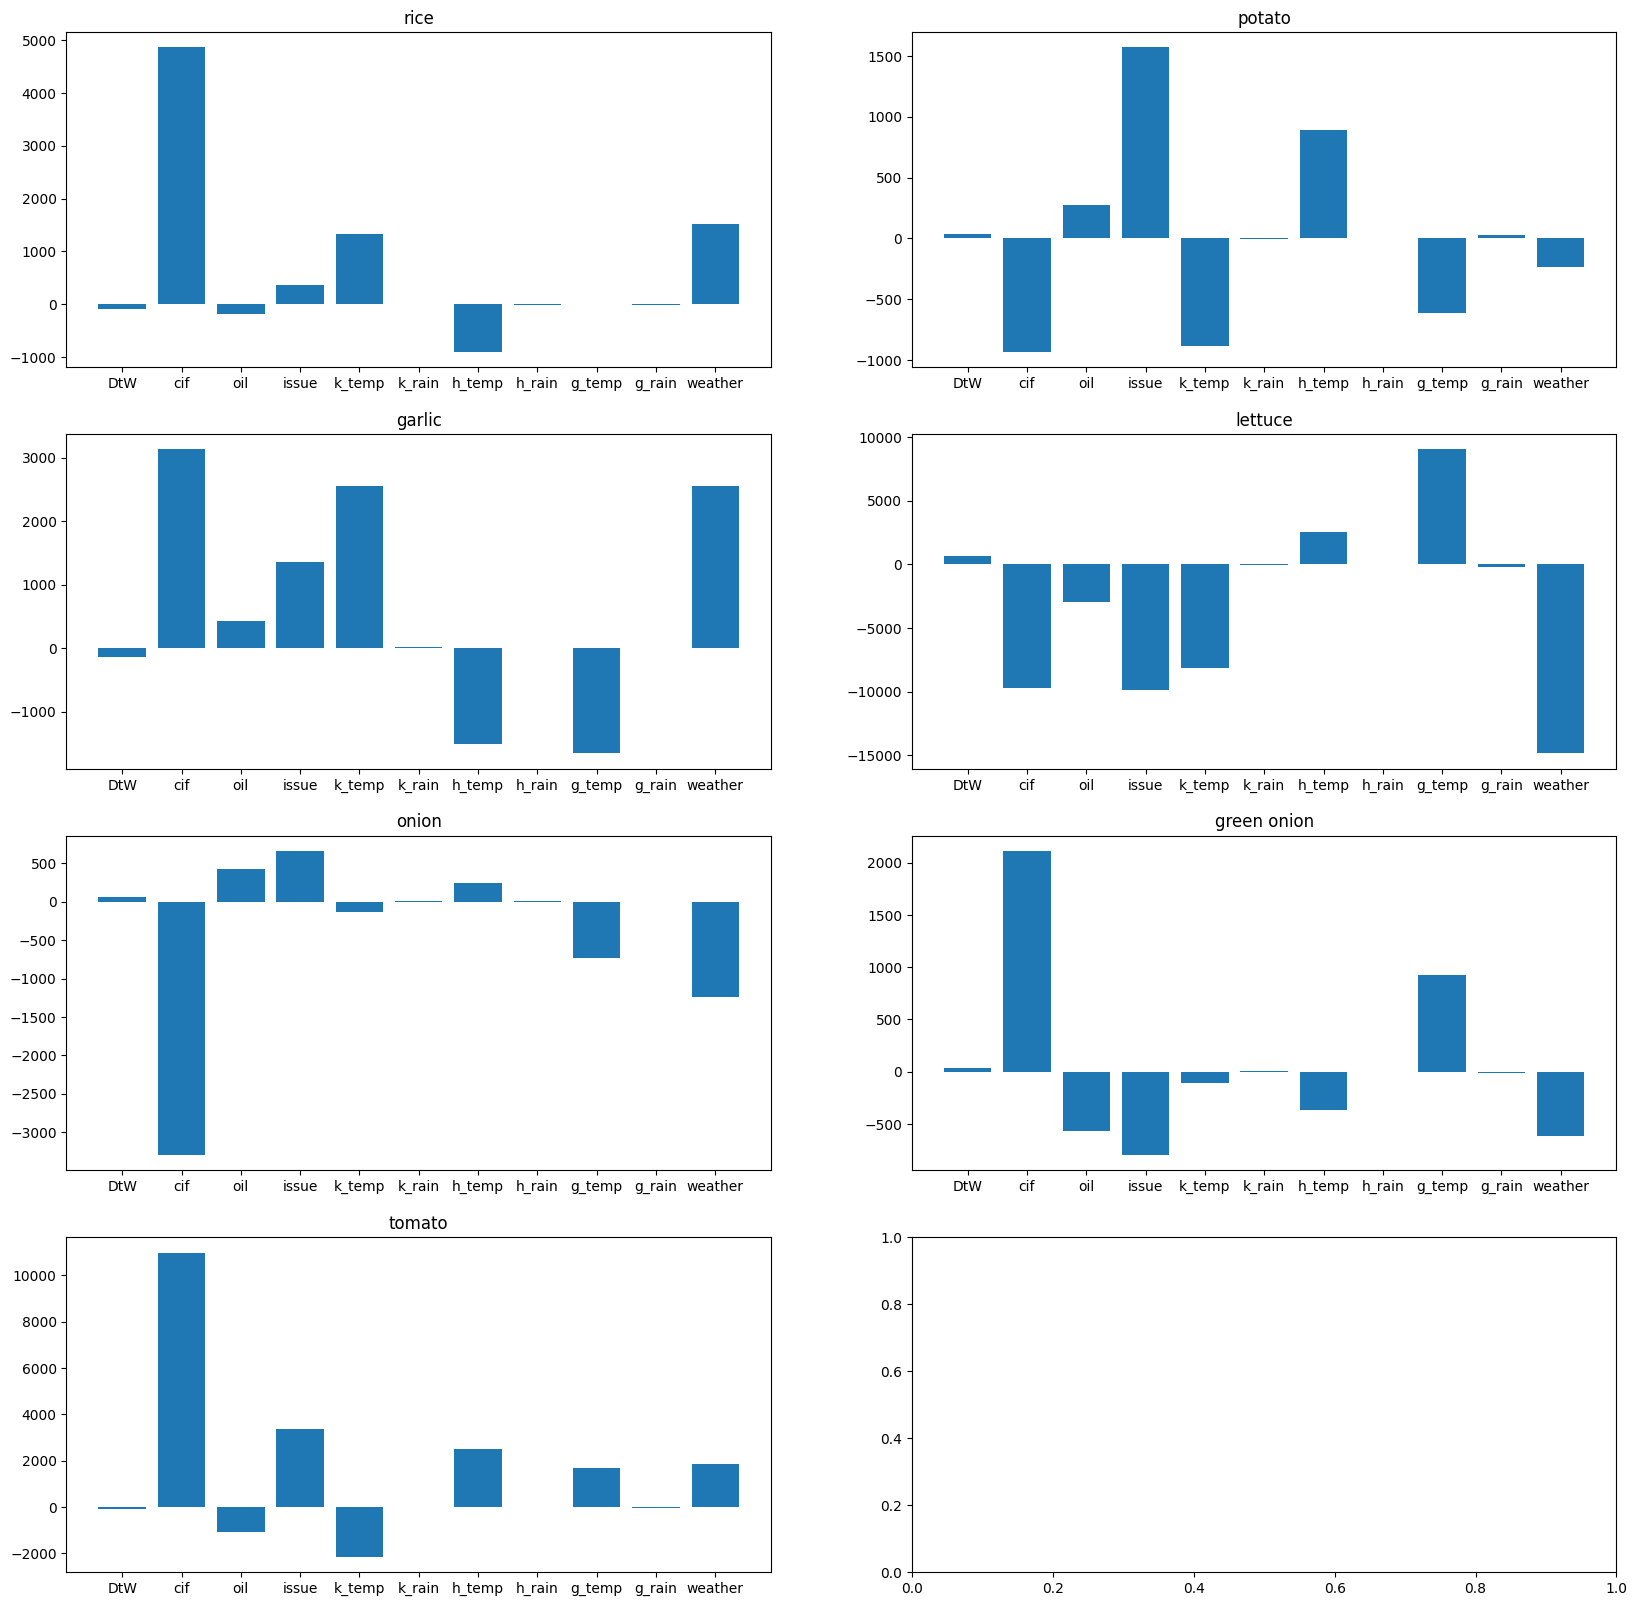

In [ ]:
# 시각화
fig, axs = plt.subplots(4,2, figsize=(20, 20))

coef = ['DtW','cif', 'oil', 'issue','k_temp','k_rain', 'h_temp','h_rain','g_temp','g_rain','weather']
food = ['rice', 'potato', 'garlic', 'lettuce', 'onion', 'green onion', 'tomato']

axs[0, 0].bar(coef, model_coef[0])
axs[0, 1].bar(coef, model_coef[1])
axs[1, 0].bar(coef, model_coef[2])
axs[1, 1].bar(coef, model_coef[3])
axs[2, 0].bar(coef, model_coef[4])
axs[2, 1].bar(coef, model_coef[5])
axs[3, 0].bar(coef, model_coef[6])

axs[0, 0].set_title(food[0])
axs[0, 1].set_title(food[1])
axs[1, 0].set_title(food[2])
axs[1, 1].set_title(food[3])
axs[2, 0].set_title(food[4])
axs[2, 1].set_title(food[5])
axs[3, 0].set_title(food[6])

정규화를 생략하여 coeffecient 크기는 제각각이지만, 공통적으로 **소비자 물가지수**와 **사회 이슈**가 중요한 factor라는 것을 확인할 수 있었다. 강수량은 생각보다 영향이 적었다.

# 가설 2에 대한 분석
먼저 소매가-도매가를 시각화해보았다.

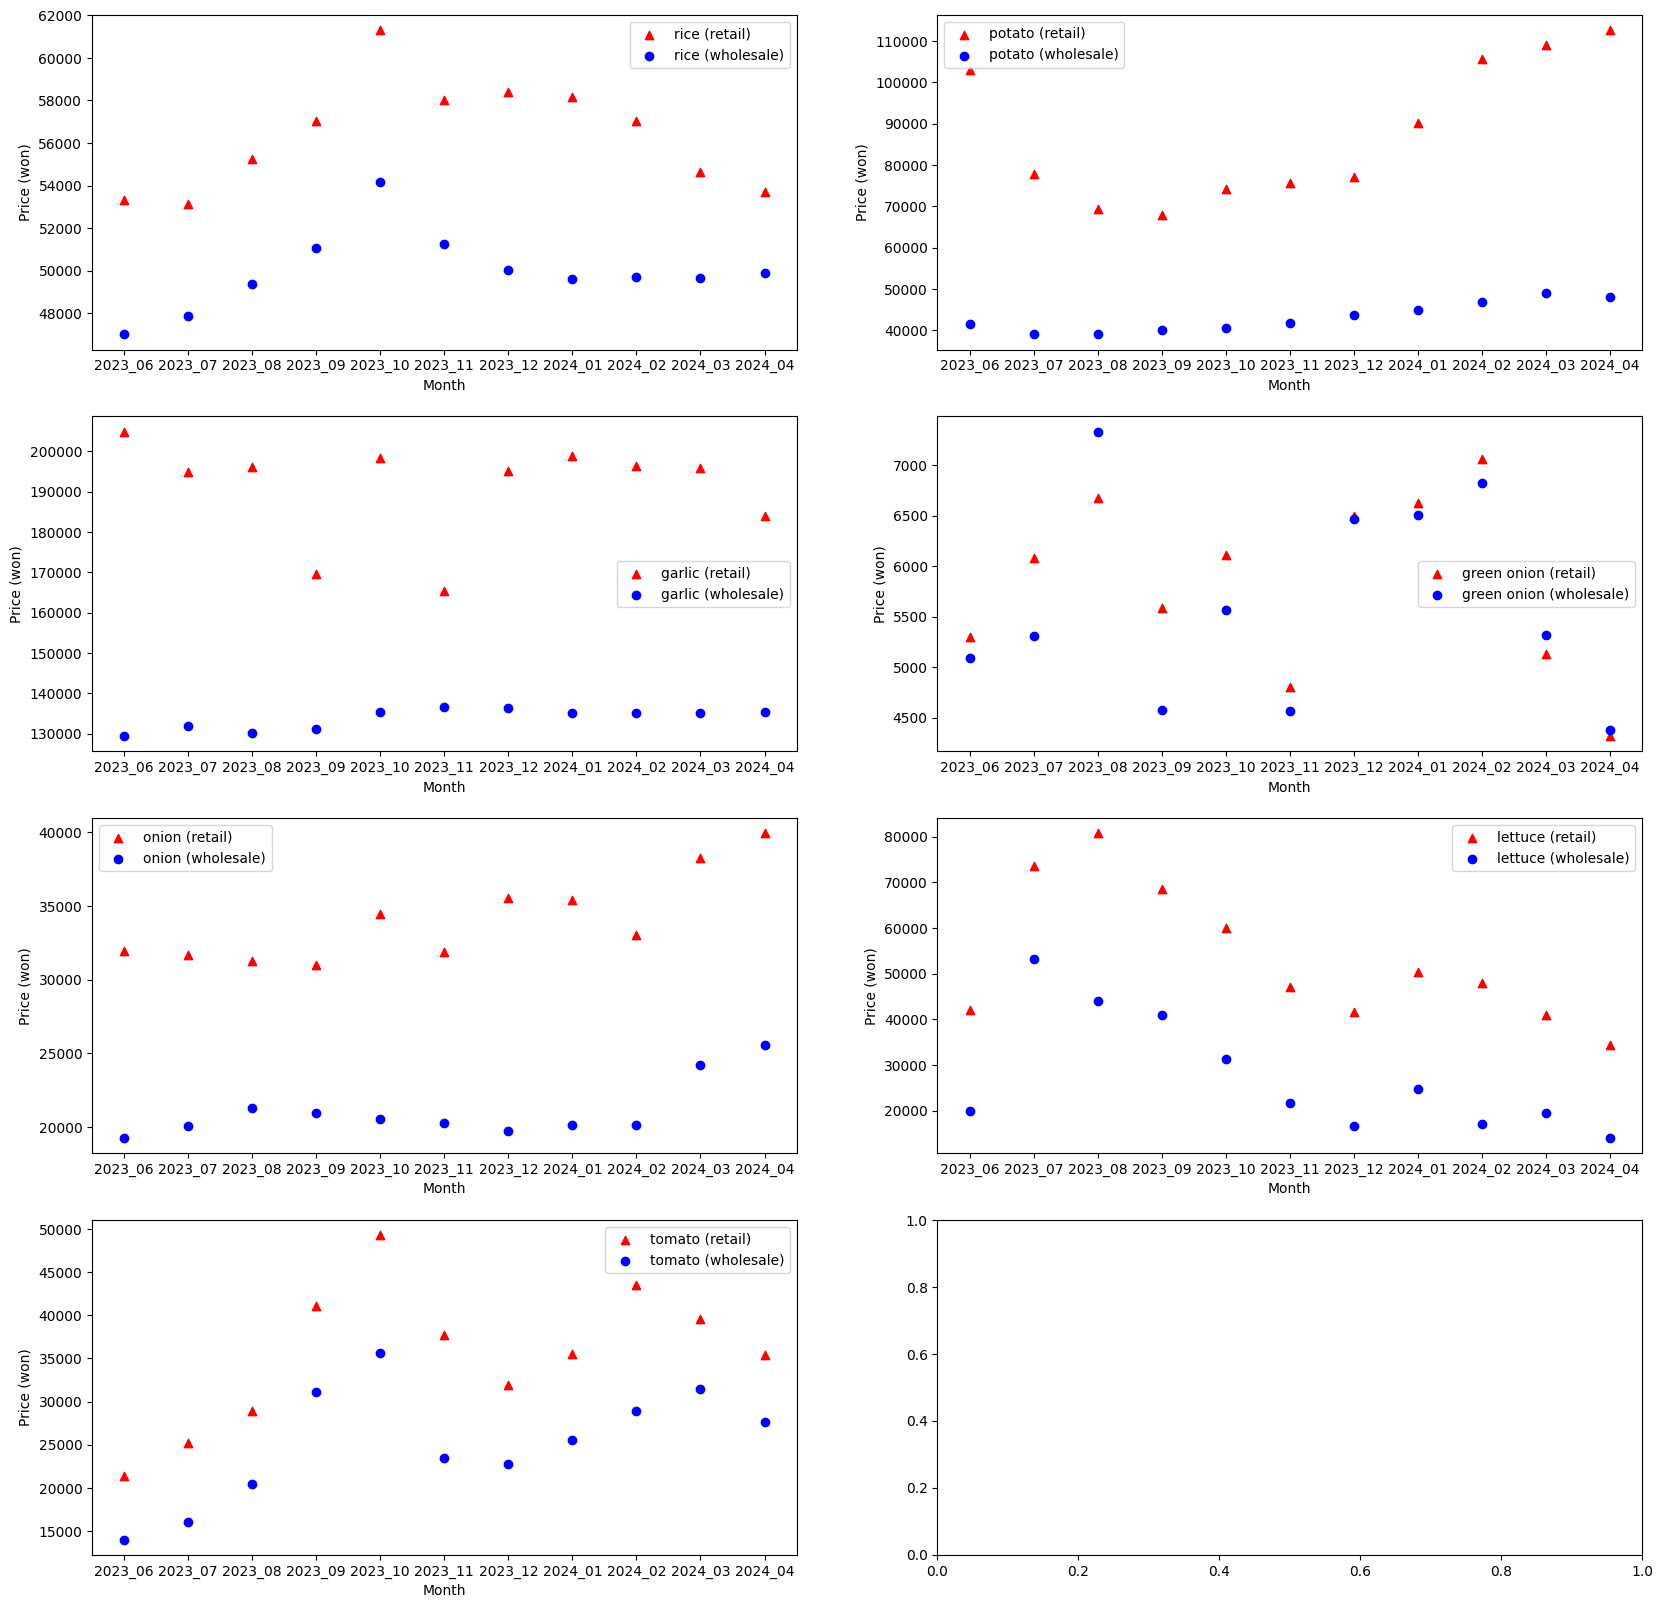

In [ ]:
# 시각화
fig, axs = plt.subplots(4,2, figsize=(20, 20))

axs[0, 0].scatter(df['날짜'], df['쌀_소매가'], marker='^', color='r', label='rice (retail)')
axs[0, 0].scatter(df['날짜'], df['쌀_도매가'], color='b', label='rice (wholesale)')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Price (won)')
axs[0, 0].legend()

axs[0, 1].scatter(df['날짜'], df['감자_소매가'], marker='^', color='r', label='potato (retail)')
axs[0, 1].scatter(df['날짜'], df['감자_도매가'], color='b', label='potato (wholesale)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Price (won)')
axs[0, 1].legend()

axs[1, 0].scatter(df['날짜'],df['마늘_소매가'],marker = '^',color = 'r',label = 'garlic (retail)')
axs[1, 0].scatter(df['날짜'],df['마늘_도매가'],color = 'b',label = 'garlic (wholesale)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Price (won)')
axs[1, 0].legend()

axs[1, 1].scatter(df['날짜'],df['파_소매가'],marker = '^',color = 'r',label = 'green onion (retail)')
axs[1, 1].scatter(df['날짜'],df['파_도매가'],color = 'b',label = 'green onion (wholesale)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Price (won)')
axs[1, 1].legend()

axs[2, 0].scatter(df['날짜'],df['양파_소매가'],marker = '^',color = 'r',label = 'onion (retail)')
axs[2, 0].scatter(df['날짜'],df['양파_도매가'],color = 'b',label = 'onion (wholesale)')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Price (won)')
axs[2, 0].legend()

axs[2, 1].scatter(df['날짜'],df['상추_소매가'],marker = '^',color = 'r',label = 'lettuce (retail)') # 상추
axs[2, 1].scatter(df['날짜'],df['상추_도매가'],color = 'b',label = 'lettuce (wholesale)')
axs[2, 1].set_xlabel('Month')
axs[2, 1].set_ylabel('Price (won)')
axs[2, 1].legend()

axs[3, 0].scatter(df['날짜'],df['토마토_소매가'],marker = '^',color = 'r',label = 'tomato (retail)')
axs[3, 0].scatter(df['날짜'],df['토마토_도매가'],color = 'b',label = 'tomato (wholesale)')
axs[3, 0].set_xlabel('Month')
axs[3, 0].set_ylabel('Price (won)')
axs[3, 0].legend()

위 plot을 통해 도매가와 소매가는 대부분 일정한 간격을 두고 비슷하게 오르내리는 모습을 볼 수 있다. 이중 몇 가지 특이한 패턴도 눈에 띄었다.
- 감자: 24년 1월부터, 도매가 상승폭에 비해 소매가가 급격히 증가함
- 양파: 23년 10월부터, 도매가가 내려감에도 소매가는 증가하는 양상을 보임.
- 파: 도매가와 소매가가 비슷하고, 역전되기도 함.

즉 선형적이지 않은 패턴이 더 많은 것을 확인할 수 있었다.


(0.0, 120000.0)

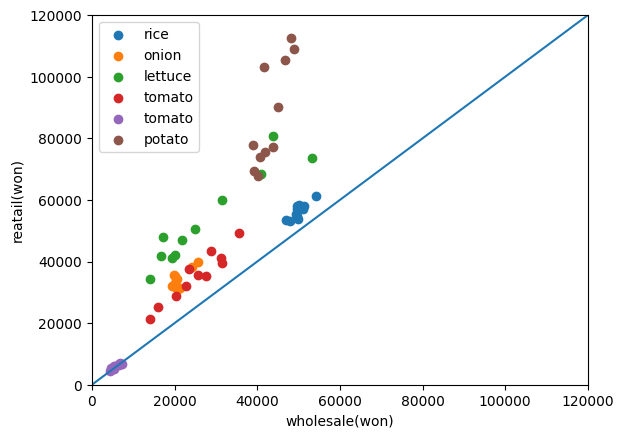

In [ ]:
plt.scatter(df['쌀_도매가'],df['쌀_소매가'],label = 'rice')
plt.scatter(df['양파_도매가'],df['양파_소매가'], label = 'onion')
plt.scatter(df['상추_도매가'],df['상추_소매가'], label = 'lettuce')
plt.scatter(df['토마토_도매가'],df['토마토_소매가'], label = 'tomato')
plt.scatter(df['파_도매가'],df['파_소매가'], label = 'tomato')
plt.scatter(df['감자_도매가'],df['감자_소매가'], label = 'potato')
plt.plot([0,120000],[0,120000])
plt.legend()
plt.ylim(0,120000)
plt.ylabel('reatail(won)')
plt.xlabel('wholesale(won)')
plt.xlim(0,120000)

In [ ]:
import scipy.stats as stats

d = ['쌀_도매가', '감자_도매가', '마늘_도매가', '상추_도매가', '양파_도매가', '파_도매가', '토마토_도매가']
s = ['쌀_소매가', '감자_소매가', '마늘_소매가', '상추_소매가', '양파_소매가', '파_소매가', '토마토_소매가']

t = []
p = []
for i in range(7):
  print(d[i],',',s[i])
  t_stat, p_value = stats.ttest_ind(df[d[i]],df[s[i]])
  t.append(t_stat)
  p.append(p_value)
  print(f"t-statistic: {t_stat}, p-value: {p_value}")

쌀_도매가 , 쌀_소매가
t-statistic: -6.681767034875255, p-value: 1.670291823353379e-06
감자_도매가 , 감자_소매가
t-statistic: -8.434931556456553, p-value: 5.0958722771581215e-08
마늘_도매가 , 마늘_소매가
t-statistic: -14.725989524842678, p-value: 3.3793262014303368e-12
상추_도매가 , 상추_소매가
t-statistic: -4.2934059963803675, p-value: 0.0003542806801152893
양파_도매가 , 양파_소매가
t-statistic: -11.983849246335708, p-value: 1.3922945140799848e-10
파_도매가 , 파_소매가
t-statistic: -0.5108803604553461, p-value: 0.615028134091186
토마토_도매가 , 토마토_소매가
t-statistic: -3.2140128793683513, p-value: 0.004354636273592492


<BarContainer object of 7 artists>

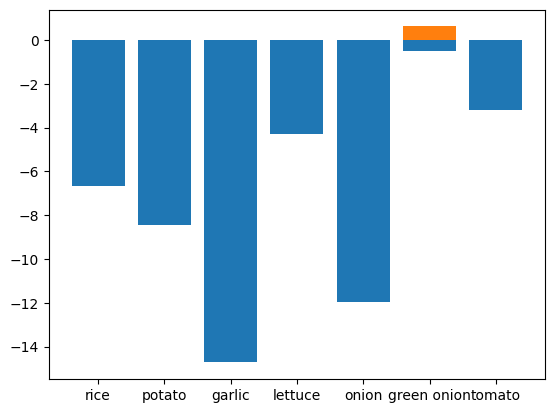

In [ ]:
# 시각화
food = ['rice', 'potato', 'garlic', 'lettuce', 'onion', 'green onion', 'tomato']

plt.bar(food,t)
plt.bar(food,p)

t값과 p값의 크기를 통해, 도매가와 소매가에 확연한 차이가 있음을 확인할 수 있다. 단 **파**의 경우 다른 항목에 비해 차이가 적음을 확인할 수 있다.

# 결론
- 음식 물가 결정에 날씨 외에도 소비자 물가지수와 사회 이슈가 중요한 결정 요소이다.
- 도매가와 소매가는 대체로 비례하나, 소매가가 훨씬 큰 경향을 보였으며 소매가 상승 폭이 도매가에 비해 큰 것을 확인할 수 있었다.

# 결과 활용방안
- 식료품을 구매하는 데 있어서 활용하게 함으로써 현명한 소비 가능
- 물가 결정에 사람이 개입하여 고칠 부분 제시 가능
- 도매 업체의 이익구조에 대한 문제 제기 (추후 분석 가능)